In [2]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns
sns.set_style(style='darkgrid')

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import 'random' to generate random sample
import random

# import statistics to perform statistical computation  
import statistics

# import 'stats' package from scipy library
from scipy import stats

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# to test the normality 
from scipy.stats import shapiro

# import the function to calculate the power of test
from statsmodels.stats import power

In [276]:
df0 = pd.read_csv('fifa_stats.csv')
df = df0.copy()
df

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,R. BorrÃ©,22,Colombia,75,82,River Plate,Right,1,3,4,High/ Medium,RS,19,5.750000,157
1996,E. ZukanoviÄ‡,31,Bosnia Herzegovina,75,75,Genoa,Left,2,3,2,Low/ High,CB,87,6.250000,187
1997,A. Elis,22,Honduras,75,82,Houston Dynamo,Right,1,4,4,High/ Medium,RM,17,5.083333,170
1998,M. FernÃ¡ndez,32,Chile,75,75,Club Necaxa,Right,2,4,5,Medium/ Medium,LDM,14,5.083333,159


# Dataset 1 cleaning

In [69]:
df.isnull().sum()

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [70]:
df.drop(columns=['Jersey Number','Club'], inplace=True) # Dropping cloumns which are not needed for analysis

In [71]:
df.head()

,Name,Age,Nationality,Overall_rating,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Height,Weight
0,L. Messi,31,Argentina,94,94,Left,5,4,4,Medium/ Medium,RF,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Right,5,4,5,High/ Low,ST,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Right,5,5,5,High/ Medium,LW,5.750000,150
3,De Gea,27,Spain,91,93,Right,4,3,1,Medium/ Medium,GK,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Right,4,5,4,High/ High,RCM,5.083333,154


In [72]:
df.isnull().sum()   #Missing values removed by dropping columns

Name                        0
Age                         0
Nationality                 0
Overall_rating              0
Potential                   0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Position                    0
Height                      0
Weight                      0
dtype: int64

# Analysis : 

In [20]:
# a) Assuming age as population, perform the central limit theorem with sample size of 200. 
#    Find the standard error and the mean of sampling distribution. 
#    Compare the results with population mean and standard deviation. Explain in non-technical terms why the
#    estimated standard error of a sample mean tends to decrease with an increase in sample size

In [22]:
pop = df['Age']
sample_size = 200
samples = 200
sample_means = []
for i in range(samples):
    sample = np.random.choice(pop, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

In [23]:
len(sample_means)

200

<AxesSubplot:ylabel='Density'>

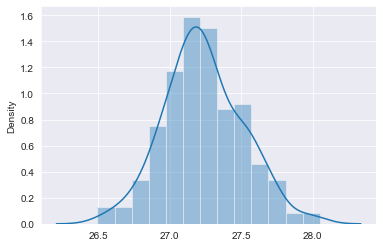

In [24]:
sns.distplot(sample_means)

In [27]:
np.mean(sample_means)  # Sampling Meam (Mu_s)

27.235775000000004

In [28]:
pop.mean()   # Population Mean (Mu)

27.2315

In [29]:
np.std(sample_means)     # Sampling std (sigma_s)

0.27566242829772797

In [46]:
pop.std()/sample_size**0.5   # Standard error = population_std(sigma)/root_n

0.2728768396819654

In [32]:
# from the above samples we can see that the sampling mean Mu_s is almost equal to population mean Mu and
# the sampling std is almost the same as pop_std/root(sample_size) which is the standard error of the sampling distribution

In [43]:
sample_size1 = 200
sample1 = np.random.choice(pop, size=sample_size, replace=True)
s = np.std(sample1)
std_error1 = s/np.power(sample_size1, 0.5)

sample_size2 = 800
sample2 = np.random.choice(pop, size=sample_size, replace=True)
s = np.std(sample2)
std_error2 = s/np.power(sample_size2, 0.5)

In [44]:
print("For Sample 1 : \nSample Size : ", sample_size1, "\nEstimated Standard error :", std_error1)
print("\nFor Sample 2 : \nSample Size : ", sample_size2, "\nEstimated Standard error :", std_error2)

For Sample 1 : 
Sample Size :  200 
Estimated Standard error : 0.2713853349022382

For Sample 2 : 
Sample Size :  800 
Estimated Standard error : 0.1428176284637159


We can see that as the sample size increases the estimated standard error decreases, this is beacuse as the no. of samples
increases the sample distribution gets closer and closer to the population distribution.

Standard error gives the accuracy of a sample mean. It describes how precise the mean of the sample is as an estimate of the true mean of the population. As the size of the sample data grows larger, the standard error decreases hence, as the sample size increases, the sample mean estimates the true mean of the population with greater precision. 


In [47]:
# ---------------------------------------------------------------------------------------------------------------

In [48]:
# 1 b) Is there any evidence that the players overall rating is greater than 80?

In [247]:
s = df['Overall_rating'].std()     # Since our dataframe itself is a sample, we can go for CI with t stat
x_bar = df['Overall_rating'].mean()
n = len(df)
t = stats.t.isf((1-0.95)/2, df=n-1)

ll = x_bar - t*s/n**0.5
ul = x_bar + t*s/n**0.5

print('confidence interval :', ll,ul)

confidence interval : 78.05290147308716 78.34109852691284


In [242]:
# The confidence interval for avg Overall rating is 78.05 to 78.34, so the avg Overall Rating for the population
# should lie within this limit. Hence it's lesser than 80.

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------

In [243]:
# 1 c) Perform the statistical test to identify whether preferred foot has any impact on potential. 
#      Also, perform the graphical analysis.

In [245]:
# Considering Potential as discrete data, going for chi-squared TOI

# Ho : Preferred foot and Potential are independent
# Ha : Preferred foot and Potential are dependent

significance_level = 0.05
obs = pd.crosstab(df['Preferred Foot'],df['Potential'])
obs

Potential,75,76,77,78,79,80,81,82,83,84,...,86,87,88,89,90,91,92,93,94,95
Preferred Foot,,,,,,,,,,,,,,,,,,,,,
Left,59,42,41,31,34,51,32,29,30,32,...,17,16,9,13,6,1,4,0,2,0
Right,153,182,176,114,120,142,111,100,107,78,...,49,36,32,18,15,11,5,4,1,1


In [250]:
test_stat, pval, dof, exp = stats.chi2_contingency(obs)
stats.chi2_contingency(obs)

(29.55053700074528,
 0.07747130218941192,
 20,
 array([[ 49.396,  52.192,  50.561,  33.785,  35.882,  44.969,  33.319,
          30.057,  31.921,  25.63 ,  22.368,  15.378,  12.116,   9.553,
           7.223,   4.893,   2.796,   2.097,   0.932,   0.699,   0.233],
        [162.604, 171.808, 166.439, 111.215, 118.118, 148.031, 109.681,
          98.943, 105.079,  84.37 ,  73.632,  50.622,  39.884,  31.447,
          23.777,  16.107,   9.204,   6.903,   3.068,   2.301,   0.767]]))

In [249]:
print("Pval is :",pval)

Pval is : 0.07747130218941192


In [251]:
# Pval is greater than significance level of 0.05
# Hence, Ho is selected, So Preferred foot and Potential are independent

In [252]:
# --------------------------------------------------------------------------------------------------------------------

In [253]:
# 1 d) Perform the statistical test to identify the relation between the overall rating and potential. 
#     [Assume both are continuous data points]

In [277]:
stats.spearmanr(df['Overall_rating'],df['Potential'])

SpearmanrResult(correlation=0.6904482380449665, pvalue=2.6831262205531135e-283)

In [ ]:
# pvalue is less than significance limit of 0.05
# Ho is rejected, Ha is selected
# So Overall_rating has a correlation with Potential

<AxesSubplot:xlabel='Overall_rating', ylabel='Potential'>

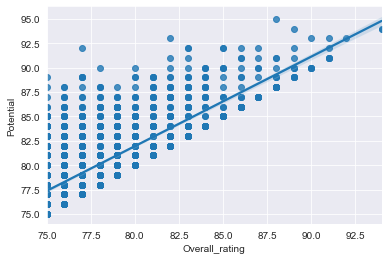

In [255]:
sns.regplot(df['Overall_rating'],df['Potential'])

In [256]:
# Potential and Overall_rating have a correlation value of 0.6904, so there's a relatively medium-strong correlation

In [257]:
# --------------------------------------------------------------------------------------------------------------------

In [258]:
# 1 e) Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

In [259]:
# chi squared TOI
# Ho : Skill moves and Overall rating are independent 
# Ha : Skill moves and Overall rating are dependent

obs = pd.crosstab(df['Skill Moves'],df['Overall_rating'])
obs

Overall_rating,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,94
Skill Moves,,,,,,,,,,,,,,,,,,,
1,38,32,23,15,19,18,5,12,13,7,2,1,1,3,3,1,1,0,0
2,96,78,63,30,24,25,13,20,10,10,12,6,3,2,2,1,0,0,0
3,219,171,138,64,72,56,28,24,17,11,9,4,7,2,3,1,2,0,0
4,74,92,75,59,52,41,43,34,27,13,8,9,1,7,3,2,3,0,1
5,2,0,5,0,4,3,4,4,3,4,2,2,1,3,0,0,0,1,1


In [260]:
test_stat, pval, dof, exp = stats.chi2_contingency(obs)
stats.chi2_contingency(obs)

(264.3544361441865,
 9.004103479489286e-24,
 72,
 array([[4.16130e+01, 3.61810e+01, 2.94880e+01, 1.62960e+01, 1.65870e+01,
         1.38710e+01, 9.02100e+00, 9.11800e+00, 6.79000e+00, 4.36500e+00,
         3.20100e+00, 2.13400e+00, 1.26100e+00, 1.64900e+00, 1.06700e+00,
         4.85000e-01, 5.82000e-01, 9.70000e-02, 1.94000e-01],
        [8.47275e+01, 7.36675e+01, 6.00400e+01, 3.31800e+01, 3.37725e+01,
         2.82425e+01, 1.83675e+01, 1.85650e+01, 1.38250e+01, 8.88750e+00,
         6.51750e+00, 4.34500e+00, 2.56750e+00, 3.35750e+00, 2.17250e+00,
         9.87500e-01, 1.18500e+00, 1.97500e-01, 3.95000e-01],
        [1.77606e+02, 1.54422e+02, 1.25856e+02, 6.95520e+01, 7.07940e+01,
         5.92020e+01, 3.85020e+01, 3.89160e+01, 2.89800e+01, 1.86300e+01,
         1.36620e+01, 9.10800e+00, 5.38200e+00, 7.03800e+00, 4.55400e+00,
         2.07000e+00, 2.48400e+00, 4.14000e-01, 8.28000e-01],
        [1.16688e+02, 1.01456e+02, 8.26880e+01, 4.56960e+01, 4.65120e+01,
         3.88960e+01, 2.5

In [261]:
print("Pval is :",pval)

Pval is : 9.004103479489286e-24


In [262]:
# since pval is lesser than significance level of 0.05, Ho is rejected, Ha is selected
# So Skill moves and Overall rating are dependent

<AxesSubplot:xlabel='Skill Moves', ylabel='Overall_rating'>

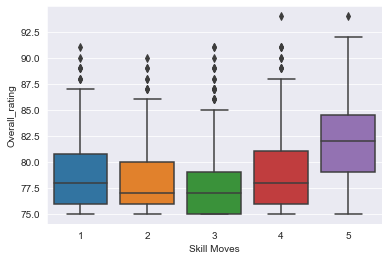

In [263]:
sns.boxplot(x=df['Skill Moves'],y=df['Overall_rating'])

In [264]:
# From the plot we can see for skill move 1-3 the 50th percentile for Overall rating is somewhat same,
# but after 3, the Overall rating increases as skill move increases.

# Dataset -2

In [279]:
df0 = pd.read_csv('phone.csv')
df = df0.copy()
df

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...
815,10-03-15 6:58,185.328156,data,2015-03,data,data
816,11-03-15 6:58,89.819383,data,2015-03,data,data
817,12-03-15 6:58,117.604998,data,2015-03,data,data
818,13-03-15 0:39,77.834006,sms,2015-03,Vodafone,mobile


In [267]:
df.isnull().sum()

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

In [268]:
# No missing values

In [269]:
# a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. 
#    Which of the Intervals are wider? Interpret the results.

In [273]:
x_bar = df['duration'].mean()
s = df['duration'].std()
n = len(df)
conf_int = [0.95,0.99]

for i in conf_int:
    t = stats.t.isf((1-i)/2, df=n-1)
    ll = x_bar - t*s/n**0.5
    ul = x_bar + t*s/n**0.5
    print(i*100,'% Confidence interval :', ll,ul)

95.0 % Confidence interval : 141.17321160796186 147.43665951170905
99.0 % Confidence interval : 140.185636073024 148.4242350466469


In [ ]:
# 99% confidence Interval is wider, this is the expected result, as the interval gets wider we can be more confident that
# the mean lies within it.

In [274]:
# -----------------------------------------------------------------------------------------------------------------------

In [275]:
# b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [290]:
# Chi squared goodness of fit
# Ho : Observed = Expected
# Ha : Observed != Expected

net = df['network'].unique()
net_count = []
for i in net:
    net_count.append(len(df[df['network']==i]))
exp = [len(df)/7]*7

stats.chisquare(f_obs=net_count, f_exp=exp)

Power_divergenceResult(statistic=307.40975609756094, pvalue=2.112592760257746e-63)

In [291]:
# pval is lesser than significance level of 0.05
# Ho is rejected, Ha is selected
# Hence, All networks are not equally distributed

In [292]:
# ------------------------------------------------------------------------------------------------------------------------

In [293]:
# c) Plot the distribution of duration with respect to each network in the same graph and
#    Interpret the results from the graph.

<AxesSubplot:xlabel='network', ylabel='duration'>

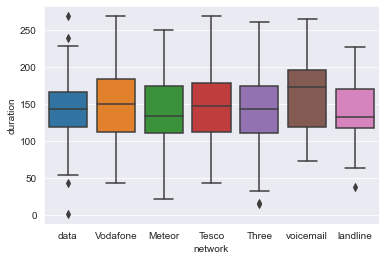

In [294]:
sns.boxplot(x=df['network'], y=df['duration'])

In [295]:
# From the plot we can observe the IQR for each network type lies around the same range of 120-180
# The 50th percetile for voicemail is slightly higher than the rest, but overall we can conclude that
# there is no relation between duration and network type

In [ ]:
# ------------------------------------------------------------------------------------------------------------------------

In [296]:
# d) Perform statistical tests to identify the relation between item and duration. Detailed 
#    explanation of relation between the classes is required.

In [303]:
# 1 continuous and 1 categorical column, going for ANOVA test
# Checking prerequisites :

# Normality :
d = {}
for i in df['item'].unique():
    d[i] = df[df['item']==i]['duration']
    print(stats.shapiro(d[i]))

ShapiroResult(statistic=0.9912639856338501, pvalue=0.48521795868873596)
ShapiroResult(statistic=0.9973042011260986, pvalue=0.7803382277488708)
ShapiroResult(statistic=0.9943404197692871, pvalue=0.37839275598526)


In [ ]:
# pval > 0.05 for all 3 item type, data is normal

In [304]:
# Equal Variance : 
stats.levene(d['data'],d['call'],d['sms'])

LeveneResult(statistic=3.4300976447008478, pvalue=0.03285087780533987)

In [305]:
# Lets assume the variance is equal for all 3 item type to continue with testing

In [306]:
# ANOVA:
# Ho : avg duration for all item type is equal
# Ha : avg duration for all item type is not equal

stats.f_oneway(d['data'],d['call'],d['sms'])

F_onewayResult(statistic=1.9313964906864995, pvalue=0.1456068656611744)

In [307]:
# pval is greater than significane level of 0.05
# Ho is selected
# Hence, the average duration for all 3 items types are equal
# Since the average duration is same for all categories, we can say that the duration is not dependent on item type
# So we can conclude that the Duration and Item type has no relation!!

In [308]:
# ---------------------------------------------------------------------------------------------------------------------

In [309]:
# e) Perform statistical tests to identify the relation between network and network_type. 

In [310]:
# Chi square TOI

# Ho : network and netwrok type are independent
# Ha : network and netwrok type are dependent

obs = pd.crosstab(df['network'], df['network_type'])
obs

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,150,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


In [311]:
test_stat, pval, dof, exp = stats.chi2_contingency(obs)
stats.chi2_contingency(obs)

(2460.0,
 0.0,
 18,
 array([[ 15.91463415,   4.45609756,  63.76463415,   2.86463415],
        [ 15.36585366,   4.30243902,  61.56585366,   2.76585366],
        [ 39.32926829,  11.01219512, 157.57926829,   7.07926829],
        [ 39.32926829,  11.01219512, 157.57926829,   7.07926829],
        [ 27.43902439,   7.68292683, 109.93902439,   4.93902439],
        [  7.68292683,   2.15121951,  30.78292683,   1.38292683],
        [  4.93902439,   1.38292683,  19.78902439,   0.88902439]]))

In [312]:
print("P-vaule is :",pval)

P-vaule is : 0.0


In [ ]:
# pval is lesser than significance level of 0.05
# Ho is rejecetd, Ha is selected
# So, network and network_type are dependent